In [1]:
import sys
sys.path.append("..")
import jsq_ps.models as jsq
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

# Explanation

+ Method A:
  - Markov chain formulation of M/M/R-JSQ-PS for _both_ $\lambda_n$ and $A_n$
  - Directly compute T, and use matrix exponential to get sojourn times
+ Method B:
  - Markov chain formulation of M/M/R-JSQ-PS for $\lambda_n$
  - Compute $A_n$ from formula
  - Directly compute T, and use matrix exponential to get sojourn times
+ Method C:
  - Use approximation to get $\lambda_n$
  - Compute $A_n$ from formula
  - Directly compute T, and use matrix exponential to get sojourn times
+ Method D:
  - Markov chain formulation of M/M/R-JSQ-PS for _both_ $\lambda_n$ and $A_n$
  - Use equation for sojourn times
+ Method E:
  - Use approximation to get $\lambda_n$
  - Compute $A_n$ from formula
  - Use equation for sojourn times
+ Method F:
  - Use approximation to get $\lambda_n$
  - Compute $A_n$ from formula
  - Use equation for sojourn times

# First experiment (R = 2, rho=0.85)

In [2]:
times = np.linspace(0, 6, 200)
lambda_ = 10
R = 2
rho = 0.85
mu = lambda_/(R * rho)
limit = 30
infty = 130

In [3]:
S = jsq.Simulation(lambda_=lambda_, mu=mu, R=R, max_time=10000, warmup=250, times=times)
A = jsq.MethodA(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
B = jsq.MethodB(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
C = jsq.MethodC(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
D = jsq.MethodD(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
E = jsq.MethodE(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
F = jsq.MethodF(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)

100%|████████████████████████████████| 10000.0/10000 [00:06<00:00, 1551.30it/s]


In [4]:
gap = times[1] - times[0]
models_names = [[A, B, C, D, E, F], ['A', 'B', 'C', 'D', 'E', 'F']]
dists = [jsq.wasserstein_distance(S.sojourn_time_cdf, M.sojourn_time_cdf, gap) for M in models_names[0]]

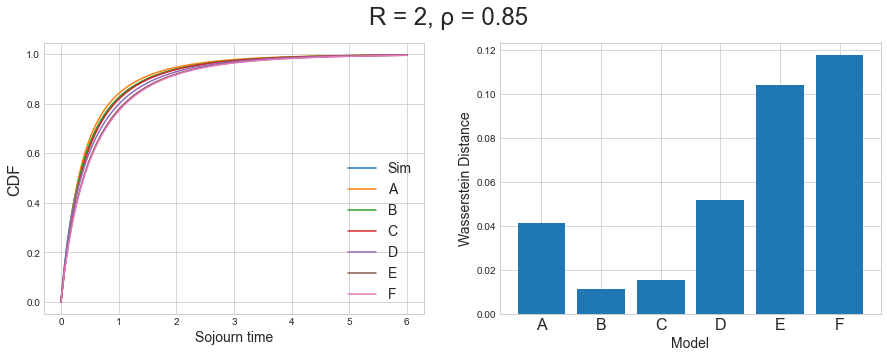

In [5]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].plot(times, S.sojourn_time_cdf, label='Sim')
axarr[0].plot(times, A.sojourn_time_cdf, label='A')
axarr[0].plot(times, B.sojourn_time_cdf, label='B')
axarr[0].plot(times, C.sojourn_time_cdf, label='C')
axarr[0].plot(times, D.sojourn_time_cdf, label='D')
axarr[0].plot(times, E.sojourn_time_cdf, label='E')
axarr[0].plot(times, F.sojourn_time_cdf, label='F')
axarr[0].set_xlabel('Sojourn time', fontsize=14)
axarr[0].set_ylabel('CDF', fontsize=16)
axarr[0].legend(fontsize=14)
axarr[1].bar(models_names[1], dists)
axarr[1].set_xlabel('Model', fontsize=14)
axarr[1].set_ylabel('Wasserstein Distance', fontsize=14)
axarr[1].tick_params(axis='x', which='major', labelsize=16)
fig.suptitle(f"R = {R}, ρ = {rho}", fontsize=24)
plt.show()

# Second Experiment (R = 3, rho=0.85)

In [6]:
times = np.linspace(0, 6, 200)
lambda_ = 10
R = 3
rho = 0.85
mu = lambda_/(R * rho)
limit = 20
infty = 130

In [7]:
S = jsq.Simulation(lambda_=lambda_, mu=mu, R=R, max_time=10000, warmup=250, times=times)
A = jsq.MethodA(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
B = jsq.MethodB(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
C = jsq.MethodC(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
D = jsq.MethodD(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
E = jsq.MethodE(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
F = jsq.MethodF(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)

100%|████████████████████████████████| 10000.0/10000 [00:07<00:00, 1403.77it/s]


In [8]:
gap = times[1] - times[0]
models_names = [[A, B, C, D, E, F], ['A', 'B', 'C', 'D', 'E', 'F']]
dists = [jsq.wasserstein_distance(S.sojourn_time_cdf, M.sojourn_time_cdf, gap) for M in models_names[0]]

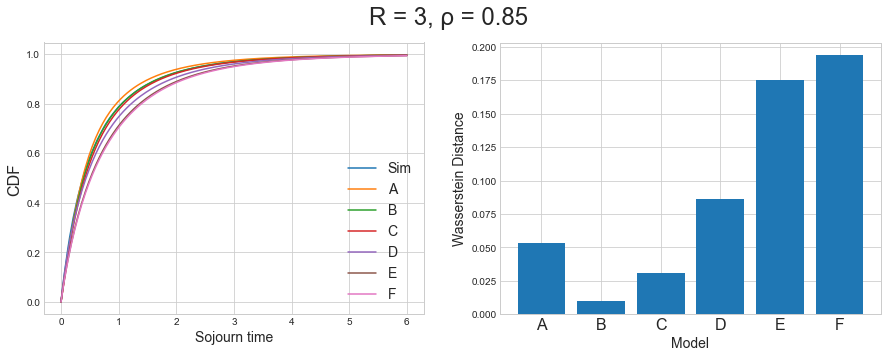

In [9]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].plot(times, S.sojourn_time_cdf, label='Sim')
axarr[0].plot(times, A.sojourn_time_cdf, label='A')
axarr[0].plot(times, B.sojourn_time_cdf, label='B')
axarr[0].plot(times, C.sojourn_time_cdf, label='C')
axarr[0].plot(times, D.sojourn_time_cdf, label='D')
axarr[0].plot(times, E.sojourn_time_cdf, label='E')
axarr[0].plot(times, F.sojourn_time_cdf, label='F')
axarr[0].set_xlabel('Sojourn time', fontsize=14)
axarr[0].set_ylabel('CDF', fontsize=16)
axarr[0].legend(fontsize=14)
axarr[1].bar(models_names[1], dists)
axarr[1].set_xlabel('Model', fontsize=14)
axarr[1].set_ylabel('Wasserstein Distance', fontsize=14)
axarr[1].tick_params(axis='x', which='major', labelsize=16)
fig.suptitle(f"R = {R}, ρ = {rho}", fontsize=24)
plt.show()

# Third Experiment (R = 2, rho = 0.93)

In [10]:
times = np.linspace(0, 6, 200)
lambda_ = 10
R = 2
rho = 0.93
mu = lambda_/(R * rho)
limit = 30
infty = 130

In [11]:
S = jsq.Simulation(lambda_=lambda_, mu=mu, R=R, max_time=10000, warmup=250, times=times)
A = jsq.MethodA(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
B = jsq.MethodB(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
C = jsq.MethodC(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
D = jsq.MethodD(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
E = jsq.MethodE(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
F = jsq.MethodF(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)

100%|████████████████████████████████| 10000.0/10000 [00:07<00:00, 1273.82it/s]


In [12]:
gap = times[1] - times[0]
models_names = [[A, B, C, D, E, F], ['A', 'B', 'C', 'D', 'E', 'F']]
dists = [jsq.wasserstein_distance(S.sojourn_time_cdf, M.sojourn_time_cdf, gap) for M in models_names[0]]

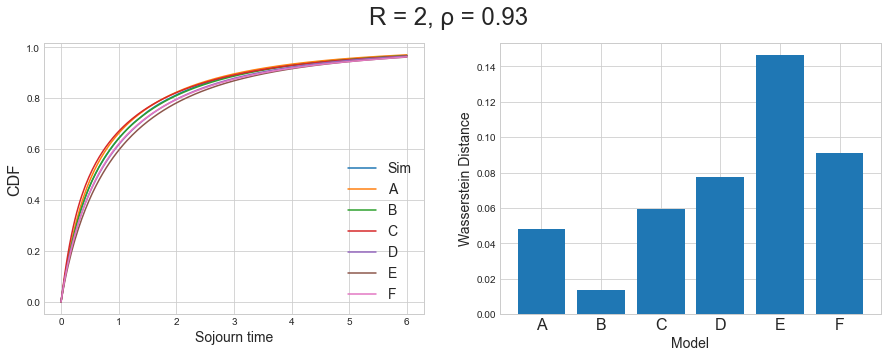

In [13]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].plot(times, S.sojourn_time_cdf, label='Sim')
axarr[0].plot(times, A.sojourn_time_cdf, label='A')
axarr[0].plot(times, B.sojourn_time_cdf, label='B')
axarr[0].plot(times, C.sojourn_time_cdf, label='C')
axarr[0].plot(times, D.sojourn_time_cdf, label='D')
axarr[0].plot(times, E.sojourn_time_cdf, label='E')
axarr[0].plot(times, F.sojourn_time_cdf, label='F')
axarr[0].set_xlabel('Sojourn time', fontsize=14)
axarr[0].set_ylabel('CDF', fontsize=16)
axarr[0].legend(fontsize=14)
axarr[1].bar(models_names[1], dists)
axarr[1].set_xlabel('Model', fontsize=14)
axarr[1].set_ylabel('Wasserstein Distance', fontsize=14)
axarr[1].tick_params(axis='x', which='major', labelsize=16)
fig.suptitle(f"R = {R}, ρ = {rho}", fontsize=24)
plt.show()

# Fourth Experiment (R = 3, rho=0.93)

In [14]:
times = np.linspace(0, 6, 200)
lambda_ = 10
R = 3
rho = 0.93
mu = lambda_/(R * rho)
limit = 20
infty = 130

In [15]:
S = jsq.Simulation(lambda_=lambda_, mu=mu, R=R, max_time=10000, warmup=250, times=times)
A = jsq.MethodA(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
B = jsq.MethodB(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
C = jsq.MethodC(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
D = jsq.MethodD(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
E = jsq.MethodE(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
F = jsq.MethodF(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)

100%|████████████████████████████████| 10000.0/10000 [00:08<00:00, 1128.69it/s]


In [16]:
gap = times[1] - times[0]
models_names = [[A, B, C, D, E, F], ['A', 'B', 'C', 'D', 'E', 'F']]
dists = [jsq.wasserstein_distance(S.sojourn_time_cdf, M.sojourn_time_cdf, gap) for M in models_names[0]]

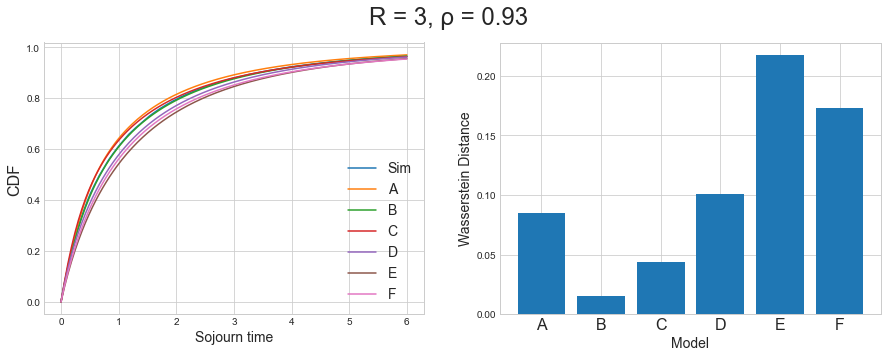

In [17]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].plot(times, S.sojourn_time_cdf, label='Sim')
axarr[0].plot(times, A.sojourn_time_cdf, label='A')
axarr[0].plot(times, B.sojourn_time_cdf, label='B')
axarr[0].plot(times, C.sojourn_time_cdf, label='C')
axarr[0].plot(times, D.sojourn_time_cdf, label='D')
axarr[0].plot(times, E.sojourn_time_cdf, label='E')
axarr[0].plot(times, F.sojourn_time_cdf, label='F')
axarr[0].set_xlabel('Sojourn time', fontsize=14)
axarr[0].set_ylabel('CDF', fontsize=16)
axarr[0].legend(fontsize=14)
axarr[1].bar(models_names[1], dists)
axarr[1].set_xlabel('Model', fontsize=14)
axarr[1].set_ylabel('Wasserstein Distance', fontsize=14)
axarr[1].tick_params(axis='x', which='major', labelsize=16)
fig.suptitle(f"R = {R}, ρ = {rho}", fontsize=24)
plt.show()

# Fifth Experiment (R = 2, rho = 0.4)

In [18]:
times = np.linspace(0, 6, 200)
lambda_ = 10
R = 2
rho = 0.4
mu = lambda_/(R * rho)
limit = 30
infty = 130

In [19]:
S = jsq.Simulation(lambda_=lambda_, mu=mu, R=R, max_time=10000, warmup=250, times=times)
A = jsq.MethodA(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
B = jsq.MethodB(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
C = jsq.MethodC(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
D = jsq.MethodD(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
E = jsq.MethodE(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)
F = jsq.MethodF(lambda_=lambda_, mu=mu, R=R, limit=limit, infty=infty, times=times)

100%|████████████████████████████████| 10000.0/10000 [00:06<00:00, 1551.02it/s]


In [20]:
gap = times[1] - times[0]
models_names = [[A, B, C, D, E, F], ['A', 'B', 'C', 'D', 'E', 'F']]
dists = [jsq.wasserstein_distance(S.sojourn_time_cdf, M.sojourn_time_cdf, gap) for M in models_names[0]]

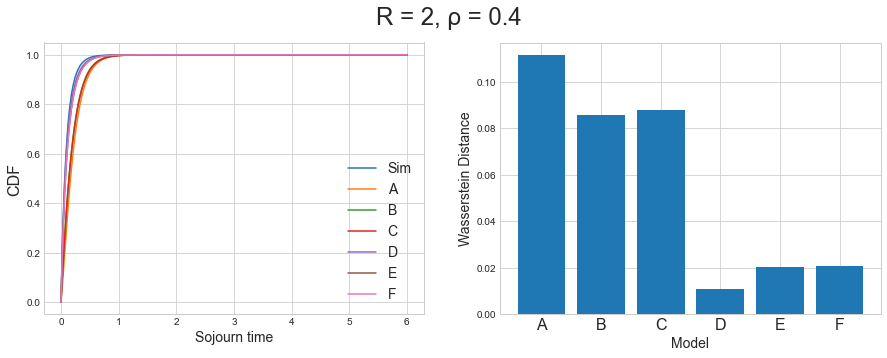

In [21]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].plot(times, S.sojourn_time_cdf, label='Sim')
axarr[0].plot(times, A.sojourn_time_cdf, label='A')
axarr[0].plot(times, B.sojourn_time_cdf, label='B')
axarr[0].plot(times, C.sojourn_time_cdf, label='C')
axarr[0].plot(times, D.sojourn_time_cdf, label='D')
axarr[0].plot(times, E.sojourn_time_cdf, label='E')
axarr[0].plot(times, F.sojourn_time_cdf, label='F')
axarr[0].set_xlabel('Sojourn time', fontsize=14)
axarr[0].set_ylabel('CDF', fontsize=16)
axarr[0].legend(fontsize=14)
axarr[1].bar(models_names[1], dists)
axarr[1].set_xlabel('Model', fontsize=14)
axarr[1].set_ylabel('Wasserstein Distance', fontsize=14)
axarr[1].tick_params(axis='x', which='major', labelsize=16)
fig.suptitle(f"R = {R}, ρ = {rho}", fontsize=24)
plt.show()